In [38]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100

# Decision Tree

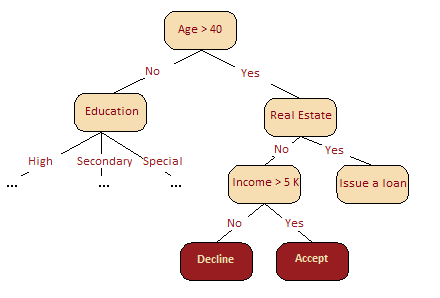



It is based on taking binary decision (hypothesis tests) over features and separate the data into smaller sets to arrive to a certain classification or numeric estimation.

Recall the game of "20 Questions", which is often referenced when introducing decision trees. You've probably played this game -- one person thinks of a celebrity while the other tries to guess by asking only "Yes" or "No" questions. What question will the guesser ask first? Of course, they will ask the one that narrows down the number of the remaining options the most. Asking "Is it Angelina Jolie?" would, in the case of a negative response, leave all but one celebrity in the realm of possibility. In contrast, asking "Is the celebrity a woman?" would reduce the possibilities to roughly half. That is to say, the "gender" feature separates the celebrity dataset much better than other features like "Angelina Jolie", "Spanish", or "loves football." This reasoning corresponds to the concept of **information gain based on entropy**.

Entropy is defined as the degree of uncertainty in a system. One way to measure it is using the shanon entropy:

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

$p_i$ is the probability of finding the system in the state i. Entropy formalize the notion of effective splitting exemplified in the previous paragraph.

Therefore, we select where or how to split a feature on the three based on the maximum information gained after splitting the feature space, which also corresponds to the maximum reduction in uncertainty in the system, i.e., maximum reduction of entropy.

Formally, the information gain (IG) for a split based on the variable  Q is defined as:

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

where q is the number of groups after the split, $N_i$ is the number of objects from the sample in which variable Q is equal to the ith value. $S_i$ is the entropy of the ith split group.


There are other two quality criteria for splits in classification problems:
+ Gini uncertainty: $G=1-\Sigma_k (p_k)^2$
+ Misclassification error: $E = 1 - max_k$

In practice, misclassification error is almost never used, and Gini uncertainty and information gain work similarly. Gini and entropy work similarly.

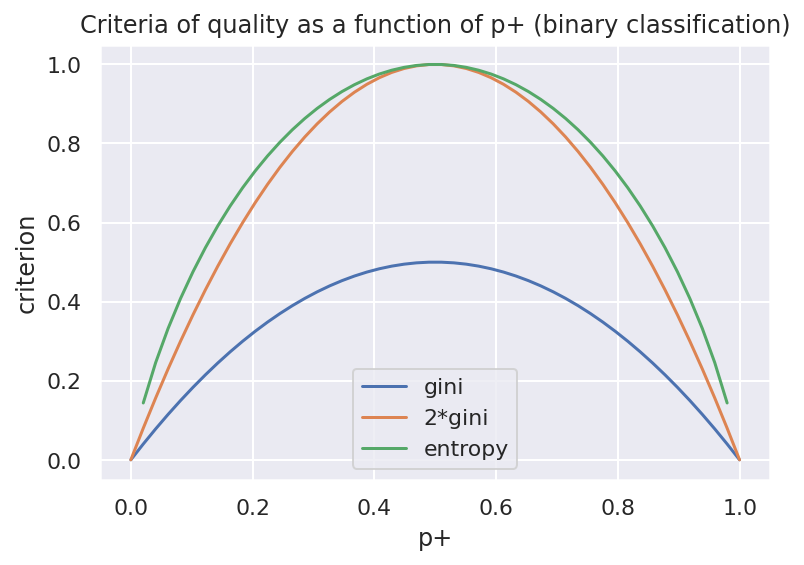

In [10]:
xx=np.linspace(0,1,50)
plt.plot(xx,[2*x*(1-x) for x in xx],label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx,[-x*np.log2(x)-(1-x)*np.log2(1-x) for x in xx],label='entropy')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend();

In [4]:
a=[[0,1,2],[3,4,5]]
np.r_['-1',a,a]

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [5]:
np.r_['0',a,a]

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [13]:
def get_grid(data):
    
    x_min,x_max=data[:,0].min()-1,data[:,0].max()+1
    y_min,y_max=data[:,1].min()-1,data[:,1].max()+1
    return np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

Let's consider fitting a decision tree to some sythetic data:

In [6]:
# first class
np.random.seed(17)
train_data=np.random.normal(size=(100,2))
train_labels=np.zeros(100)

# second class
train_data=np.r_[train_data,np.random.normal(size=(100,2),loc=2)]
train_labels=np.r_[train_labels,np.ones(100)]

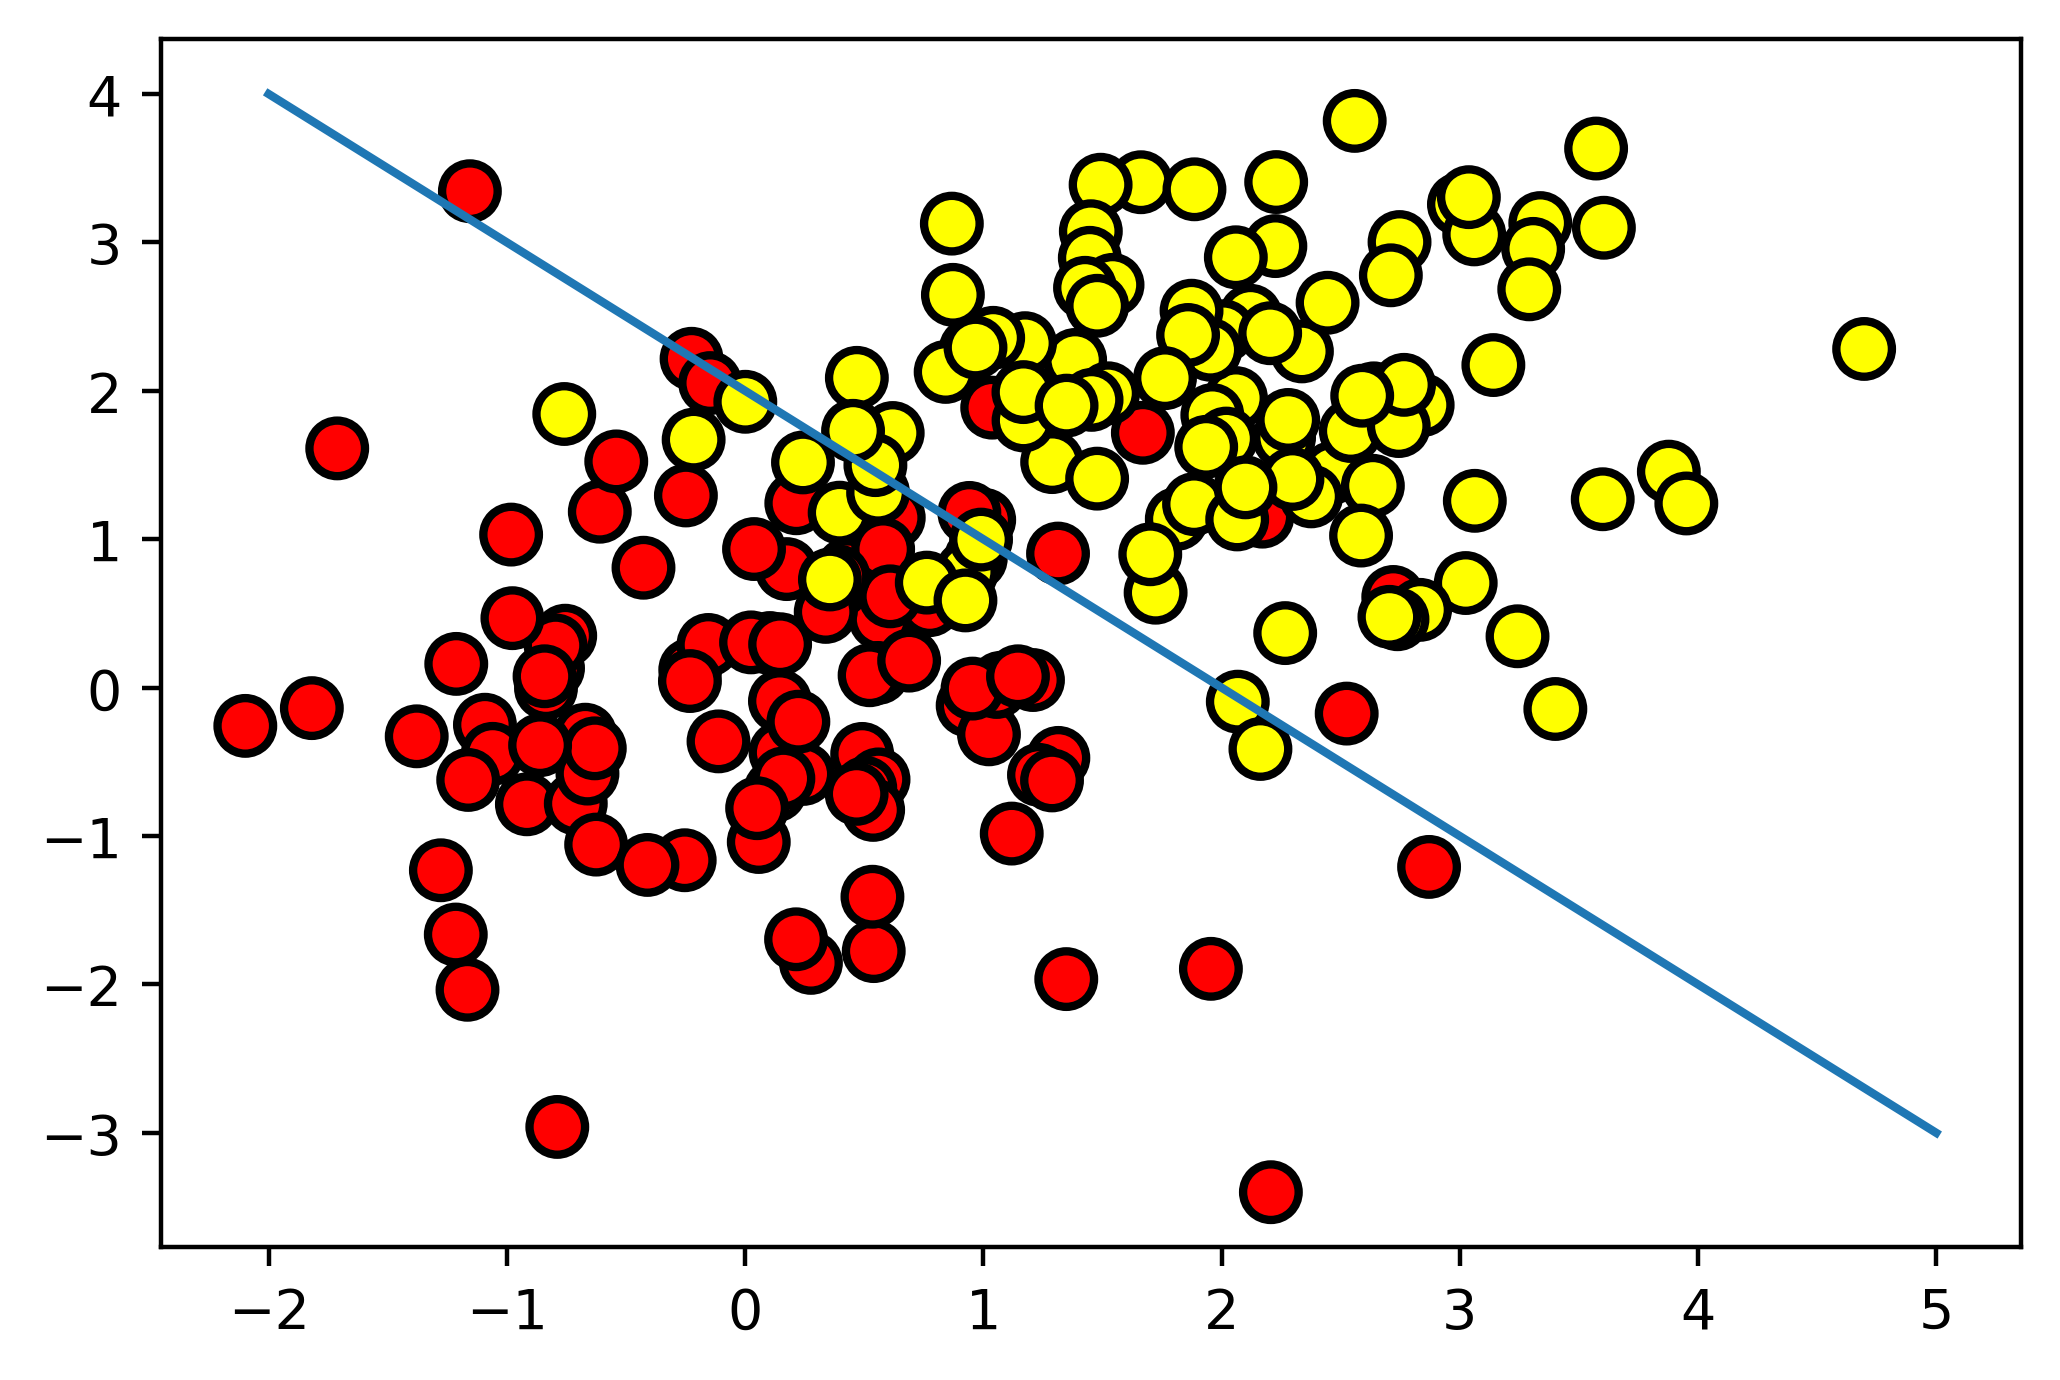

In [7]:
plt.scatter(train_data[:,0],train_data[:,1],c=train_labels,s=100,
           cmap='autumn',edgecolors='black',linewidth=1.5);
plt.plot([-2,5],[4,-3])

Let's try to separate these two classes by training a Sklearn decision tree. max_depth parameter limits the depth of the tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:


clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=17)

#training the tree
clf_tree.fit(train_data,train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

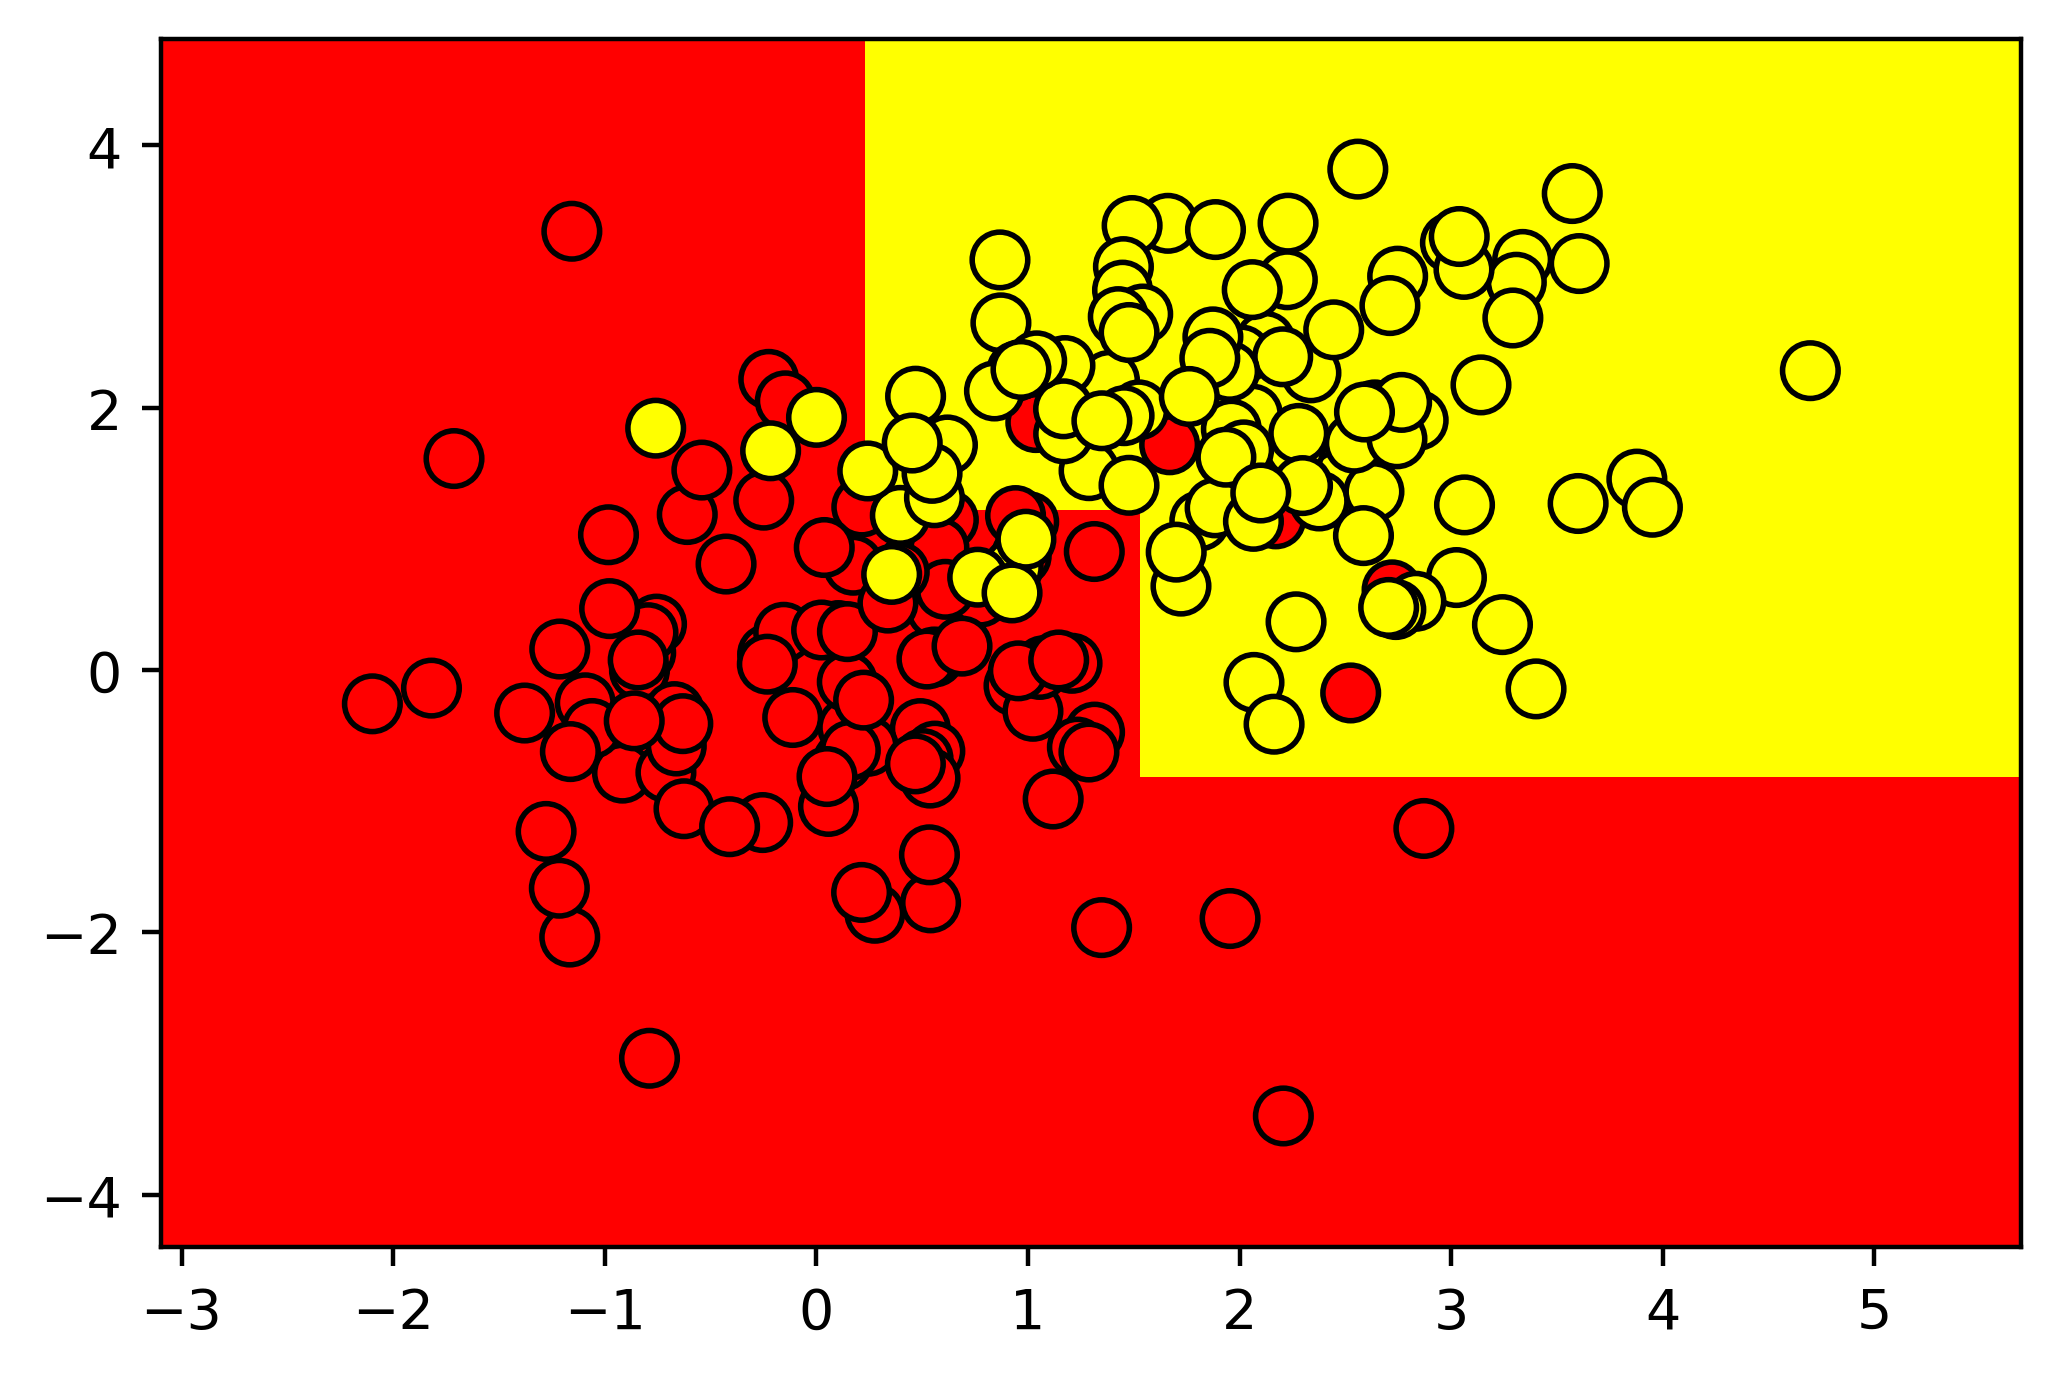

In [10]:
xx,yy=get_grid(train_data)
predicted=clf_tree.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted,cmap='autumn')
plt.scatter(train_data[:,0],train_data[:,1],c=train_labels,s=100,cmap='autumn',
           edgecolors='black')

In [11]:
from sklearn.tree import plot_tree

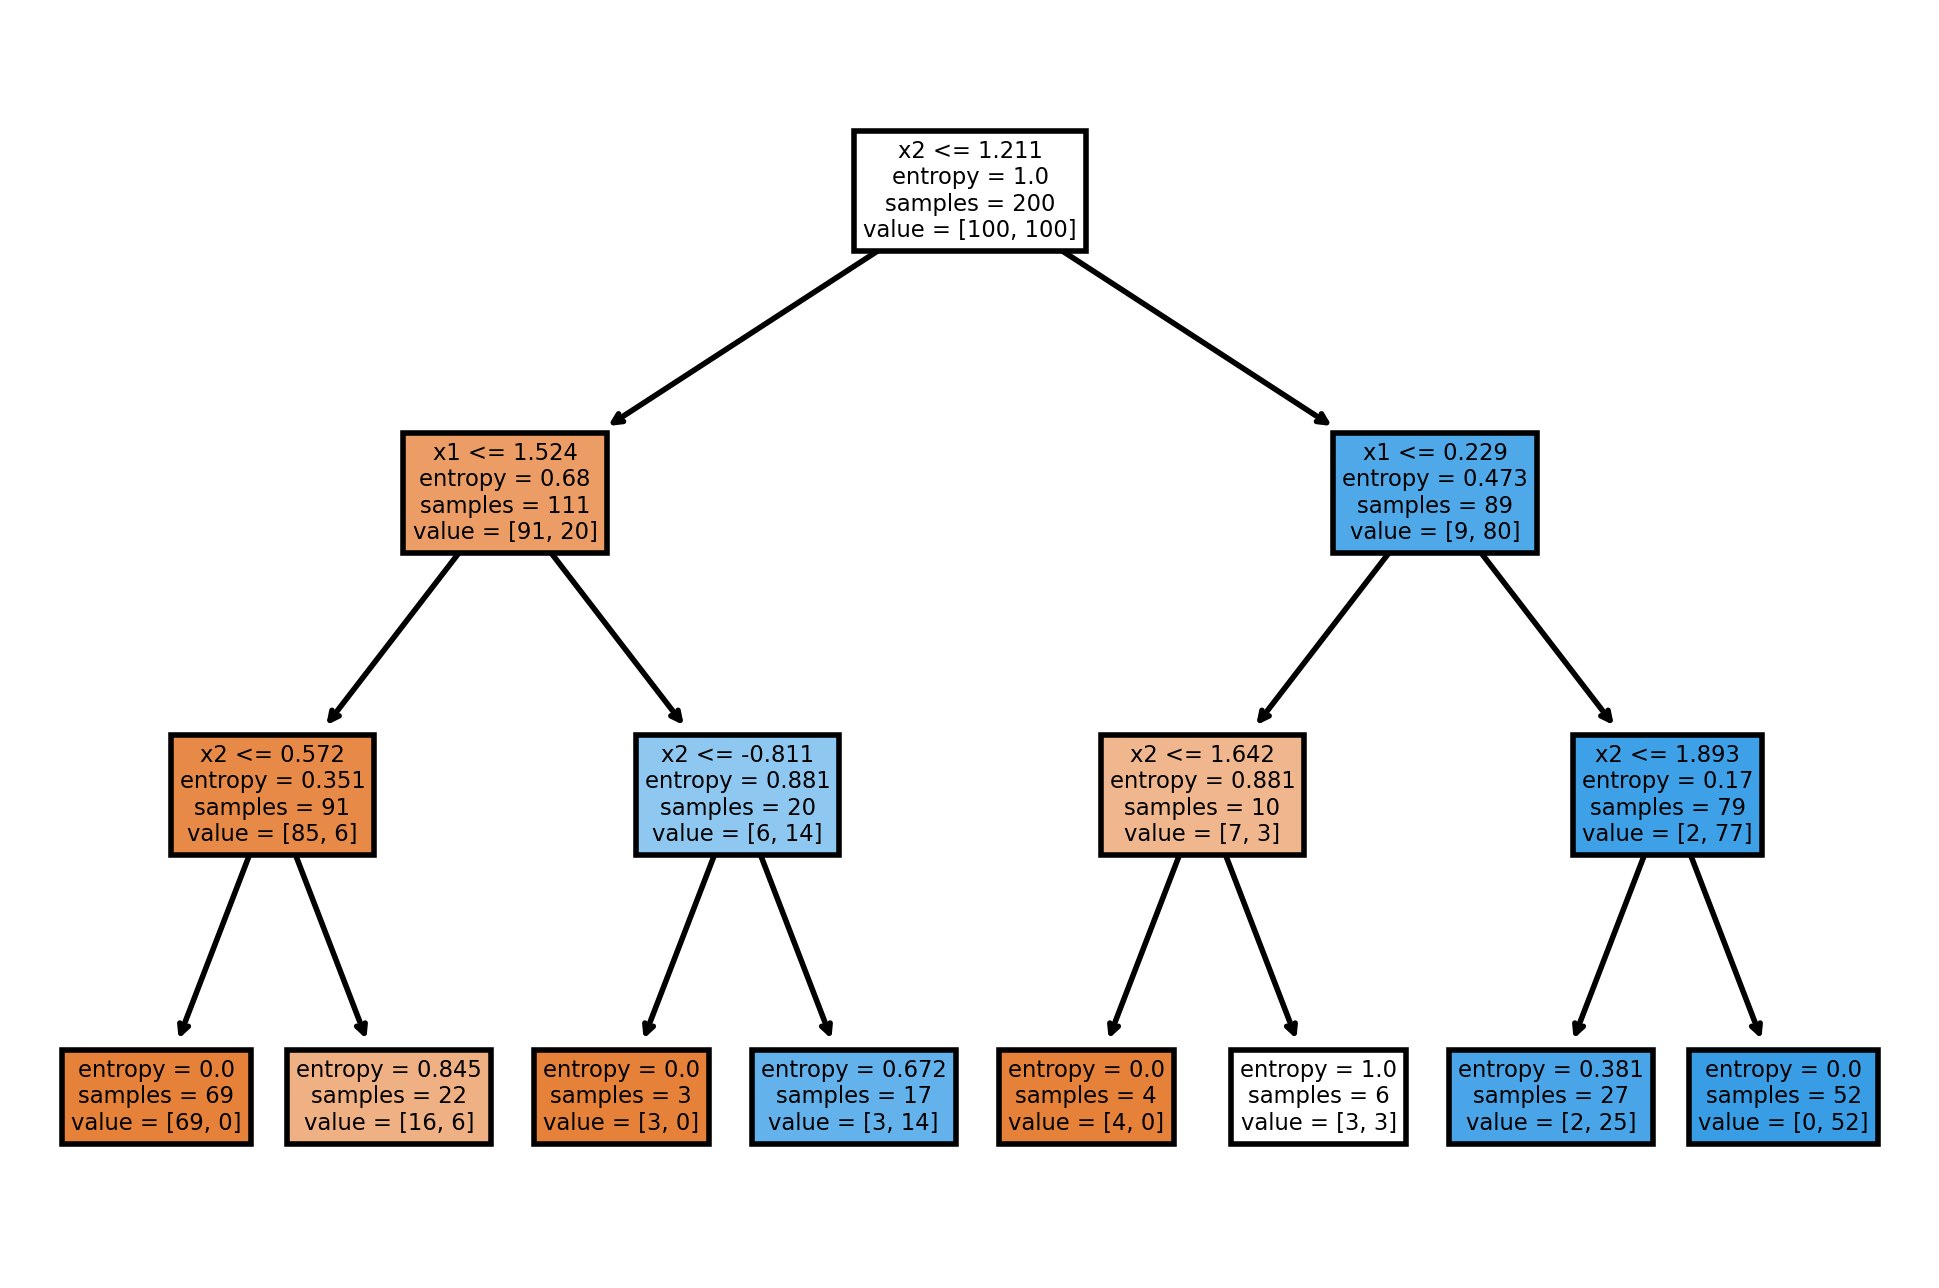

In [13]:
plot_tree(clf_tree,feature_names=['x1','x2'],filled=True);

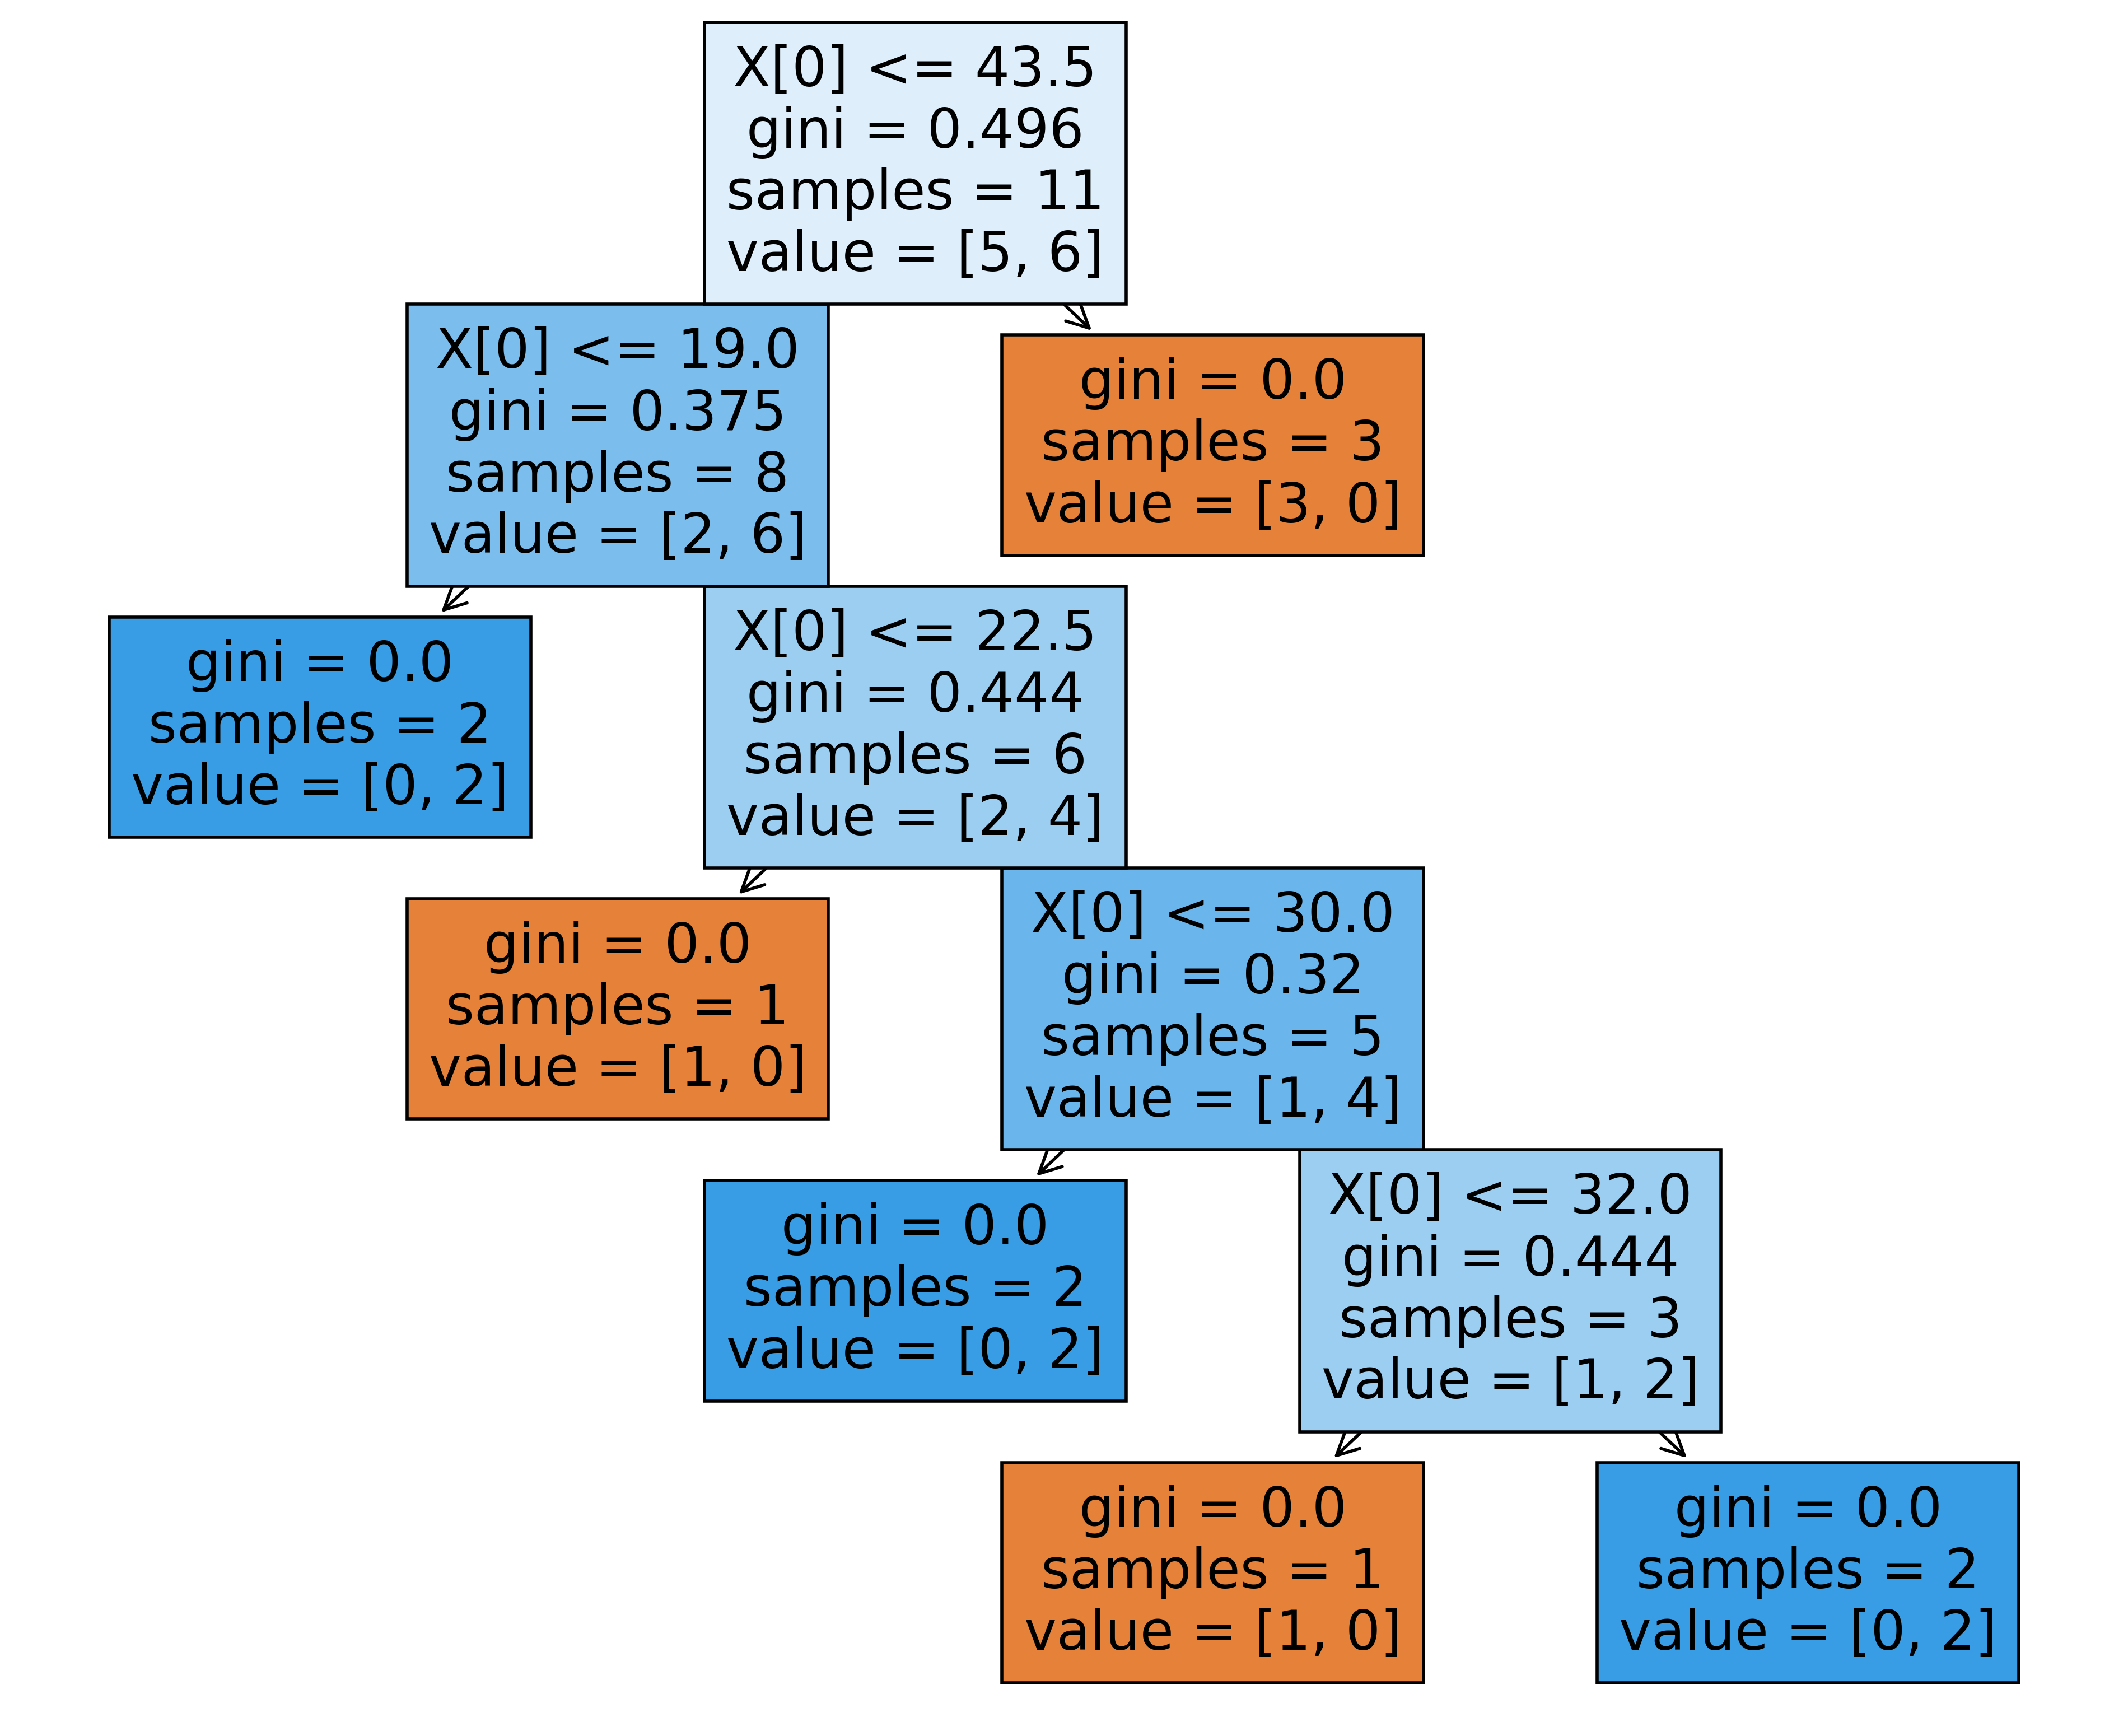

In [14]:
data=pd.DataFrame({'Age':[17,64,18,20,38,49,55,25,29,31,33],
                  'Loan Default':[1,0,1,0,1,0,0,1,1,0,1]})

age_tree=DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1,1),data['Loan Default'].values)

plt.figure(figsize=(12,10))
plot_tree(age_tree,filled=True);

In [15]:
data2 = pd.DataFrame({'Age':  [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], 
                      'Salary': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
                      'Loan Default': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]})

In [16]:
age_sal_tree=DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Age','Salary']].values,data['Loan Default'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

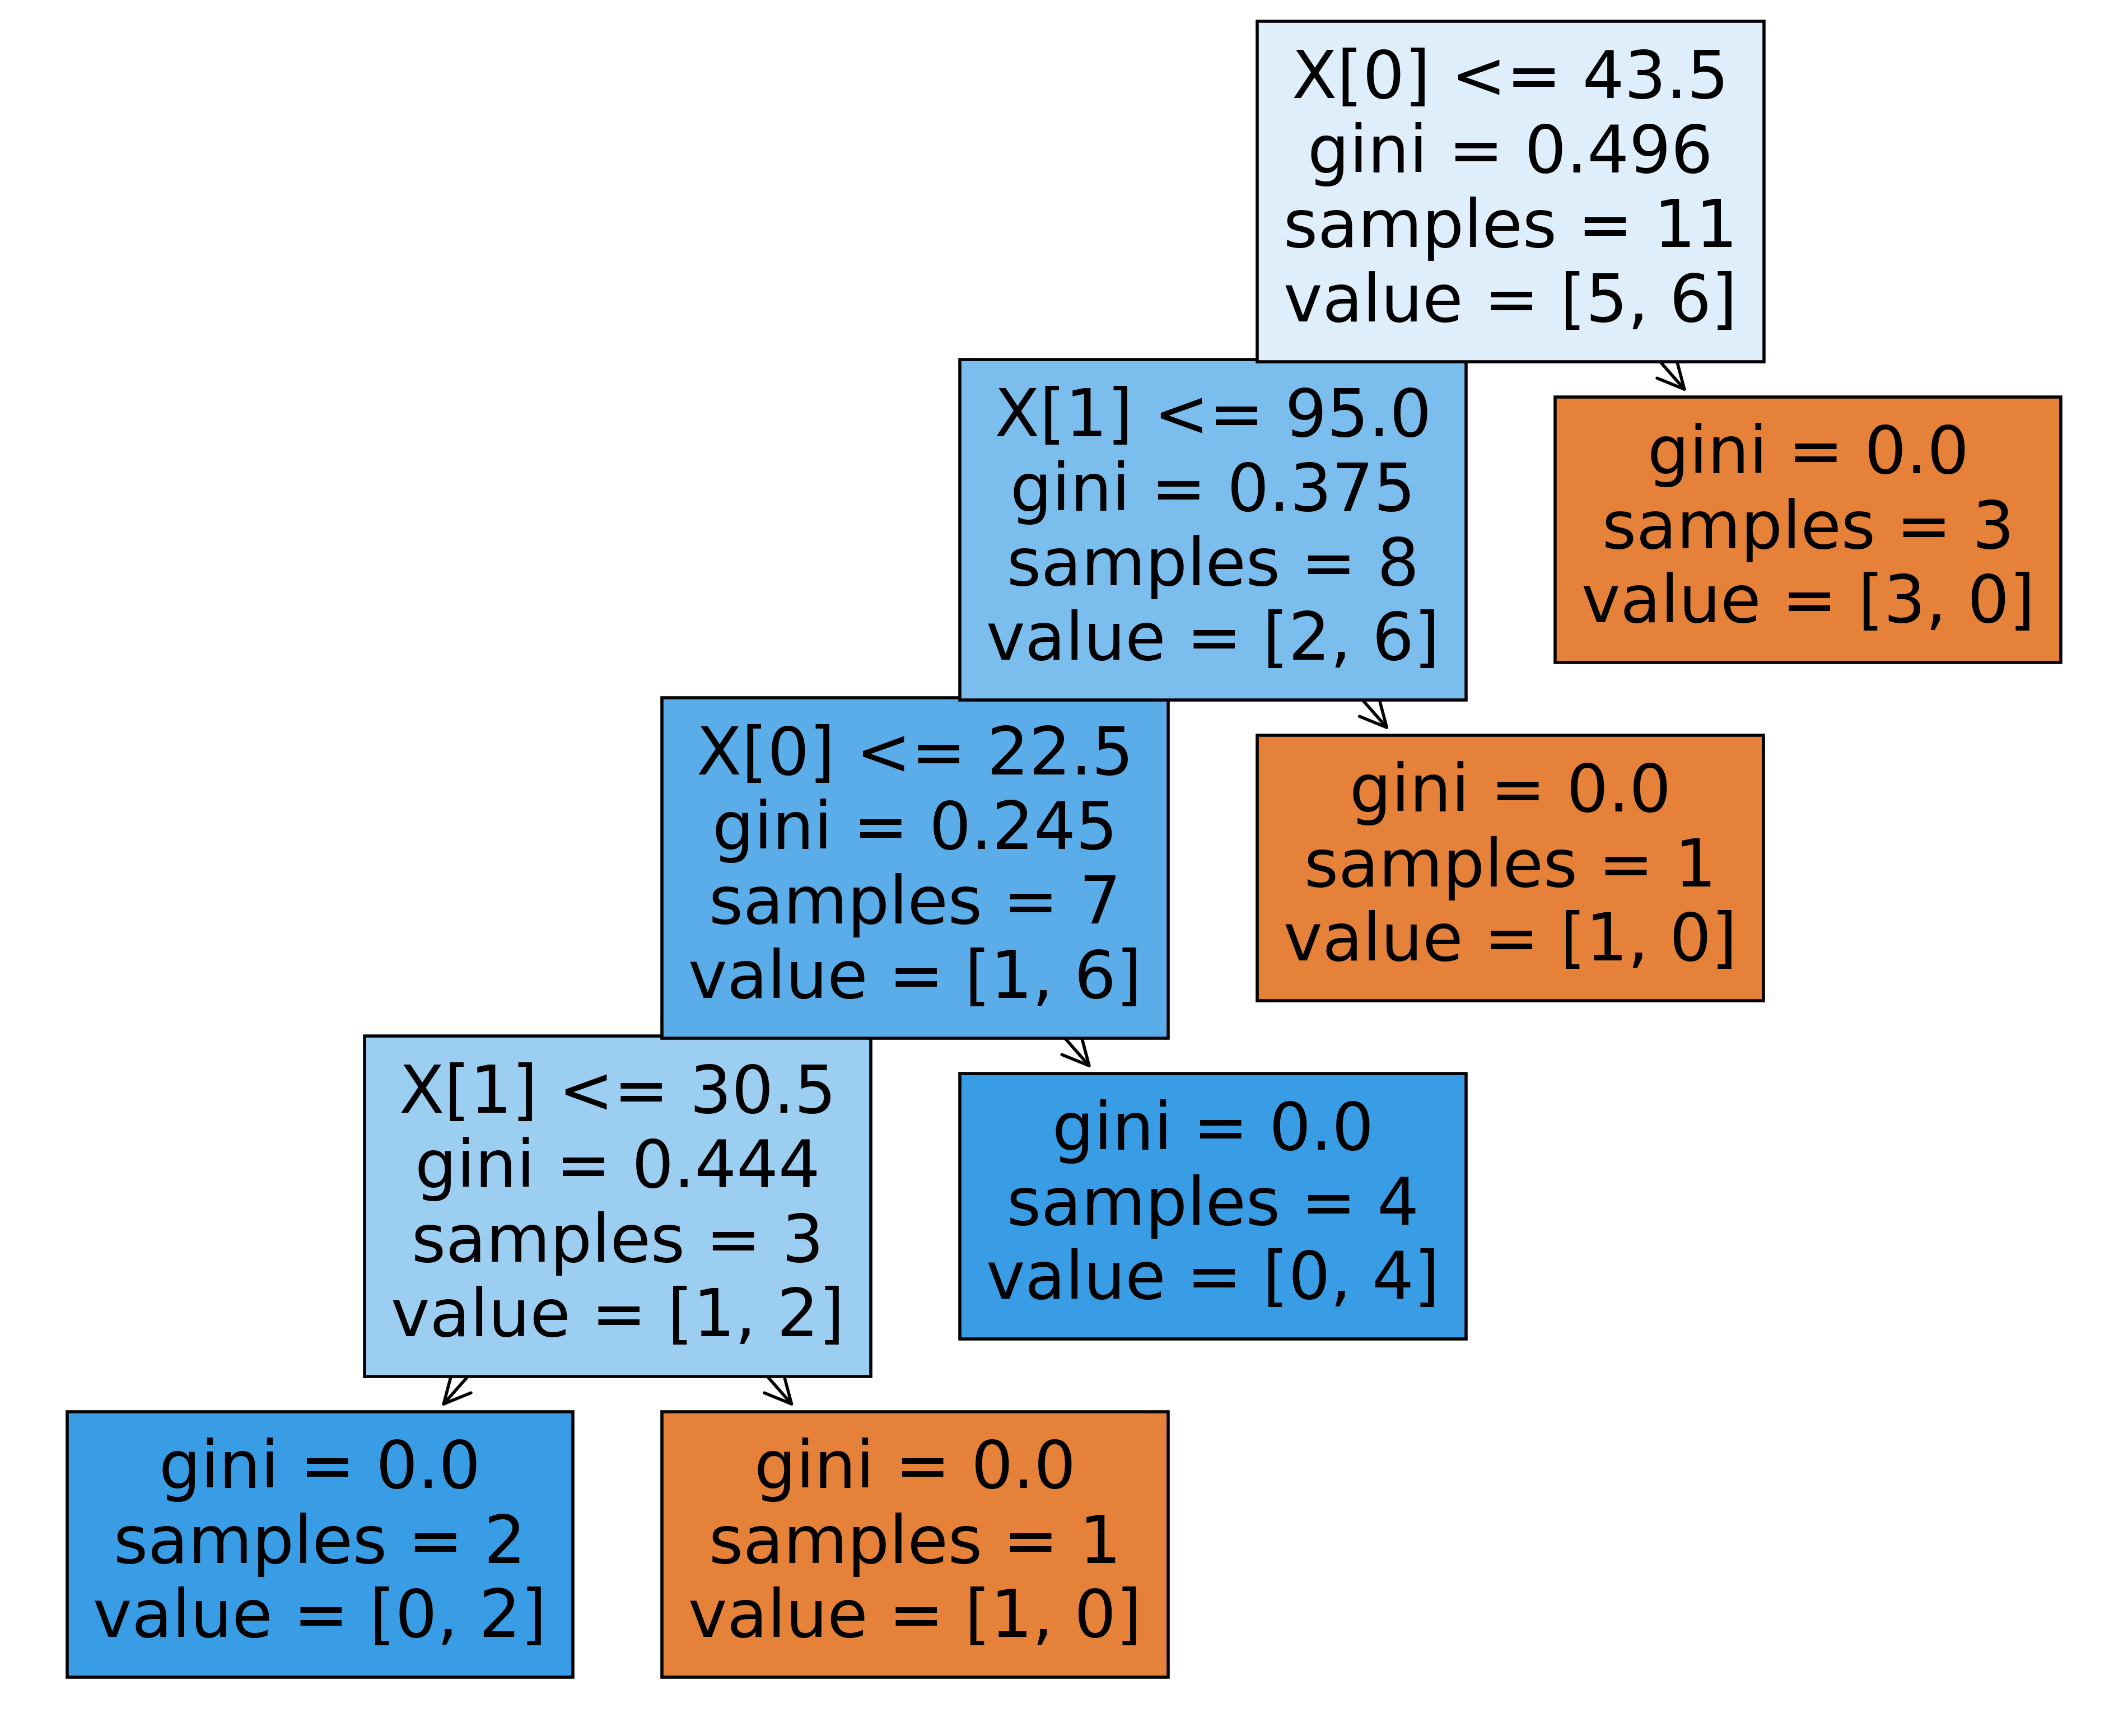

In [17]:
plt.figure(figsize=(12,10))
plot_tree(age_sal_tree,filled=True);

## The main parameters of the sklearn.tree.DecisionTreeClasifier class are:
+ max_depth: the maximum depth of the tree
+ max_features: the maximum number of features with which search for the best partition (this is usually necessary when there is large number of features for it would be too costly to search for partitions for all features)
+ min_samples_leaf: the minimum number of samples in a leaf. 

These choose of parameters is usually done by cross-validation  

### Decision tree in a Regression problem
In the case of regression the change is the quality measure. Instead of using entropy or gini uncertainty, we use the variance and we perform the split based on the maximum reduction of variance. 

Text(0.5, 1.0, 'Decision tree regressor, MSE = 0.02')

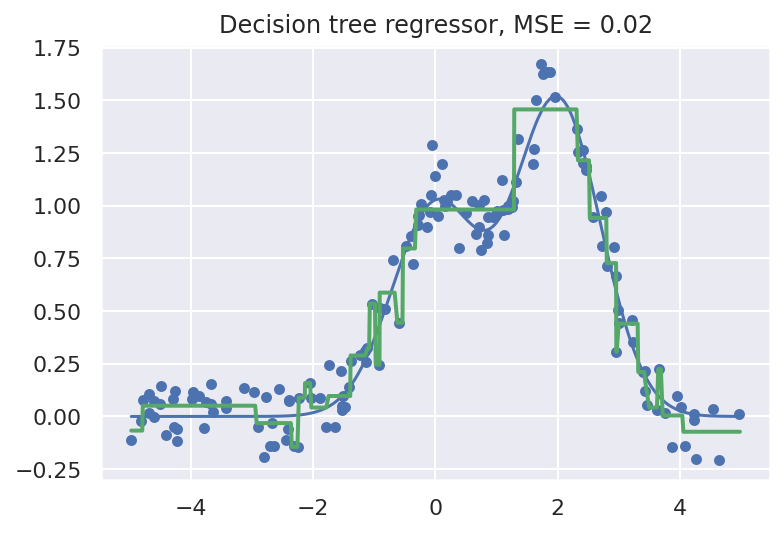

In [82]:
n_train=150
n_test=1000
noise=0.1

def f(x):
    
    x=x.ravel()
    return np.exp(-x**2)+1.5*np.exp(-(x-2)**2)

def generate(n_samples,noise):
    X=np.random.rand(n_samples) * 10 - 5
    X=np.sort(X).ravel()
    y=f(X) + np.random.normal(0.0,noise,n_samples)
    X=X.reshape((n_samples,1))
    return X,y

X_train,y_train = generate(n_samples=n_train,noise=noise)
X_test,y_test=generate(n_samples=n_test,noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree=DecisionTreeRegressor(max_depth=5,random_state=17)

reg_tree.fit(X_train,y_train)
reg_tree_pred=reg_tree.predict(X_test)

plt.plot(X_test,f(X_test),'b')
plt.scatter(X_train,y_train,c='b',s=20)
plt.plot(X_test,reg_tree_pred,'g',lw=2)
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))

# KNN : K- Nearest neighbors

It is a supervised machine learning method.

To classify each point from the test set we perform the following operations:

1. We calculate the distance of the test point to the training points. 
2. Select the k closest samples from the training set to the test point.
3. The class assigned to the test point will be based on the majority rule, i.e., we assign the most frequent class among the k closest samples to the test point.

This method can be easily adapted to a regression setting by using a mean or median of the k closest samples as the estimator. 

One notable feature of KNN is its laziness. Calculations are only done during the prediction phase. No model is learned from the training set. 

Nearest Neighbors Method in Real Applications
+ k-NN can serve as a good starting point (baseline) in some cases;


+ In Kaggle competitions, k-NN is often used for the construction of meta-features (i.e. k-NN predictions as input to other models) or for stacking/blending;


+ The nearest neighbors method extends to other tasks like recommendation systems. The initial decision could be a recommendation of a product (or service) that is popular among the closest neighbors of the person for whom we want to make a recommendation;


+ In practice, on large datasets, approximate methods of search are often used for nearest neighbors. There is a number of open source libraries that implement such algorithms; check out Spotify's library Annoy.

## Main parameters of KNeighborsClassifier:
+ weights: uniform(all weights are equal), distance (the weight is inversely proportional to the distance from the test sample), or any other custom-defined distance.


+ algorithm (optional): brute, ball_tree, KD_tree, or auto. In the first case, the nearest neighbors for each test case are computed by a grid search over the training set. In the second and third cases, the distances between the examples are stored in a tree to accelerate finding nearest neighbors. If you set this parameter to auto, the right way to find the neighbors will be automatically chosen based on the training set.


+ leaf_size (optional): threshold for switching to grid search if the algorithm for finding neighbors is BallTree or KDTree;


+ metric: minkowski, manhattan, euclidean, chebyshev, or other.

# Choosing Model Parameters and Cross-Validation

In [18]:
import pandas_profiling 

In [19]:
df=pd.read_csv('telecom_churn.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [21]:
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn']  = df['Churn'].astype(int)
states=df['State']
y=df['Churn']
df.drop(['State','Churn'],axis=1,inplace=True)

In [22]:
df.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                0   
1             107        415                   0                0   
2             137        415                   0                1   
3              84        408                   1                1   
4              75        415                   1                1   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [24]:
X_train,X_holdout,y_train,y_holdout=train_test_split(df.values,y,test_size=0.3,
                                                    random_state=17)

tree=DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=17)
knn=KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train,y_train)

# for kNN we need to scale features.
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_holdout_scaled=scaler.transform(X_holdout)

knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
tree_pred=tree.predict(X_holdout)
accuracy_score(y_holdout,tree_pred)

0.94

In [27]:
knn_pred=knn.predict(X_holdout_scaled)
accuracy_score(y_holdout,knn_pred)

0.89

Let's tune the parameters using cross-validation

In [28]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [29]:
tree_params={'max_depth':range(1,11),
            'max_features':range(4,19)}
tree_grid=GridSearchCV(tree,tree_params,cv=5,n_jobs=-1,verbose=True)
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_fea

In [30]:
# List the best parameters and the correspending mean accuracy from cross-validation.
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [31]:
tree_grid.best_score_

0.94257014456259

In [32]:
accuracy_score(y_holdout,tree_grid.predict(X_holdout))

0.946

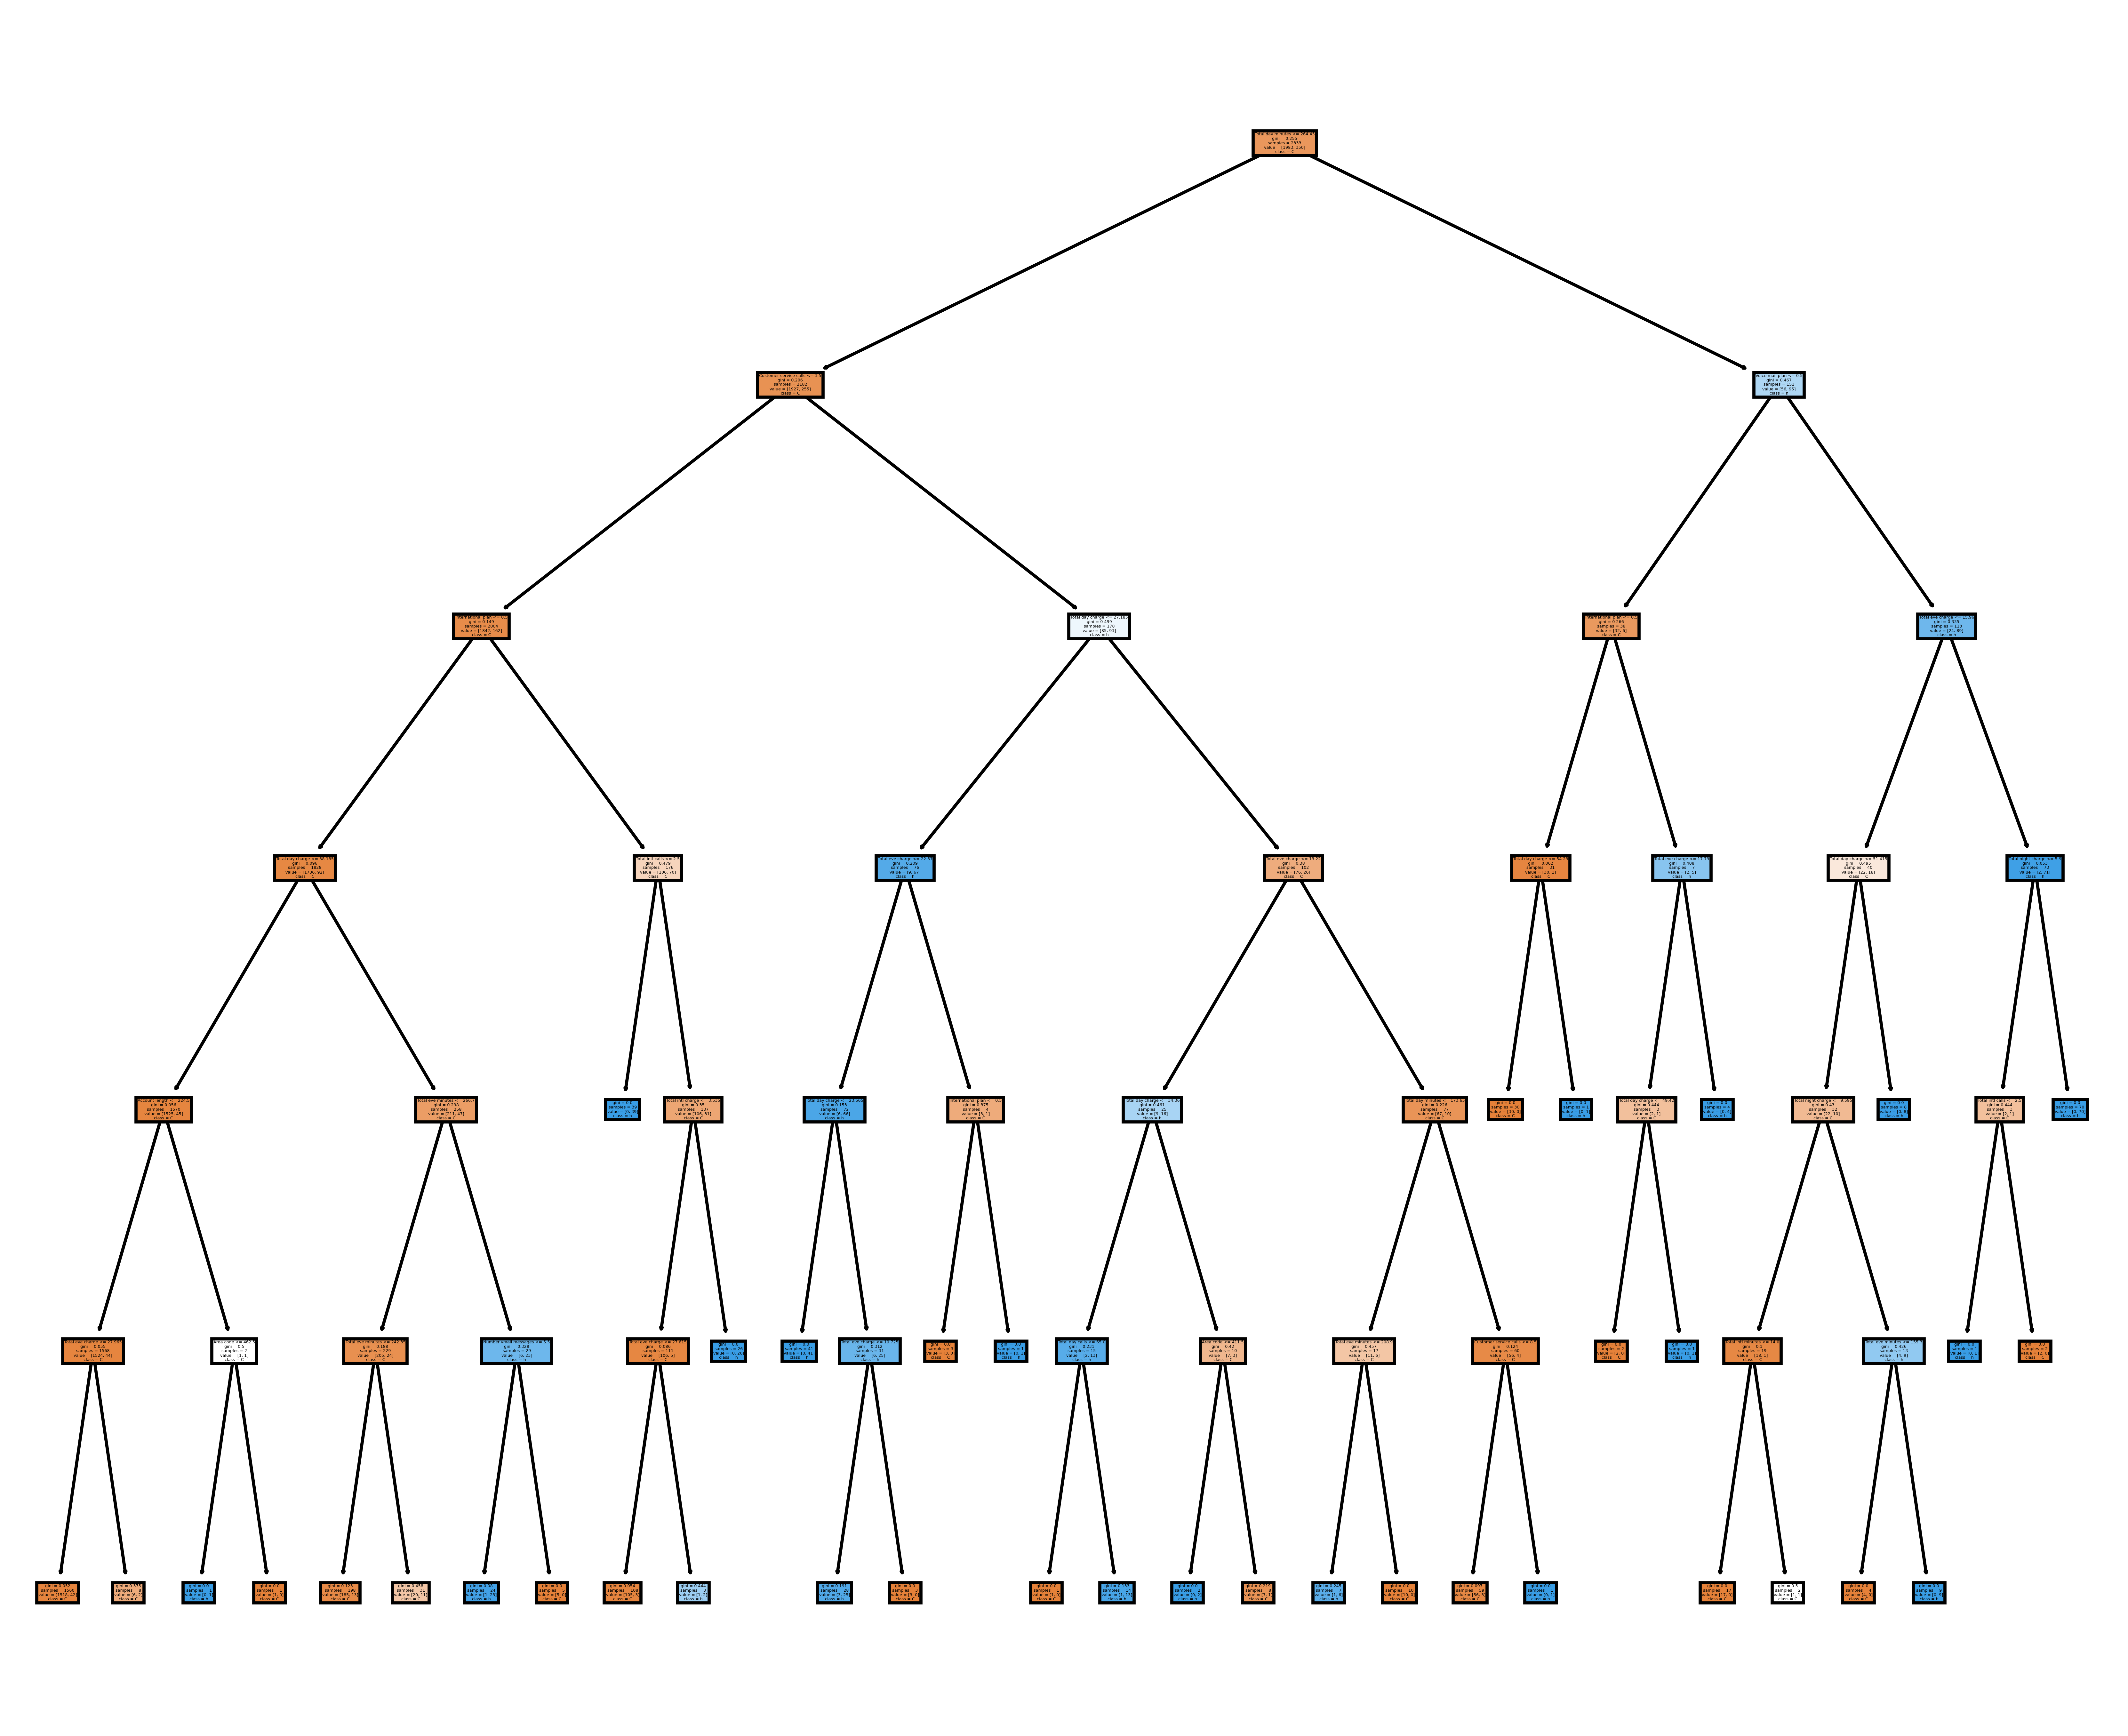

In [43]:
plt.figure(figsize=(12,10))
plot_tree(decision_tree=tree_grid.best_estimator_,filled=True,
          feature_names=df.columns,class_names=y.name);

In [52]:
from sklearn.pipeline import Pipeline

In [54]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params={'knn__n_neighbors':range(1,10)}

knn_grid=GridSearchCV(knn_pipe,knn_params,cv=5,n_jobs=-1,verbose=True)

knn_grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             

In [55]:
knn_grid.best_params_,knn_grid.best_score_

({'knn__n_neighbors': 7}, 0.8859867109023905)

In [56]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout)) 

0.89

In [58]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

0.9494233119813256


In [59]:
forest_params={'max_depth':range(6,12),
              'max_features':range(4,19)}

forest_grid=GridSearchCV(forest,forest_params,cv=5,n_jobs=-1,verbose=True)
forest_grid.fit(X_train,y_train)

forest_grid.best_params_,forest_grid.best_score_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  3.0min finished


({'max_depth': 9, 'max_features': 6}, 0.9511372931045574)

In [60]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout)) # 0.953

0.953

Let's create linear separable data and analyze the behavior of different the two classification algorithms:

In [2]:
def from_linearly_separable_data(n=500,x1_min=0,x1_max=30,x2_min=0,x2_max=30):
    data,target=[],[]
    for i in range(n):
        x1=np.random.randint(x1_min,x1_max)
        x2=np.random.randint(x2_min,x2_max)
        if np.abs(x1-x2)>.5:
            data.append([x1,x2])
            target.append(np.sign(x1-x2))
    return np.array(data),np.array(target)

X,y=from_linearly_separable_data()

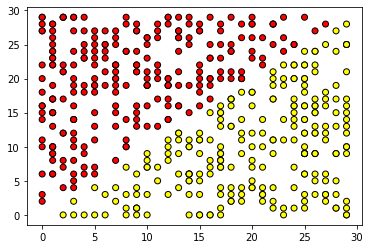

In [9]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn',edgecolors='black')

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree=DecisionTreeClassifier(criterion='entropy',random_state=17).fit(X,y)

xx,yy=get_grid(X)

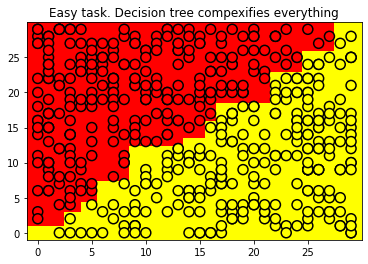

In [27]:
predicted=tree.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted,cmap='autumn')
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='autumn',edgecolors='black',linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

In [28]:
from sklearn.tree import plot_tree

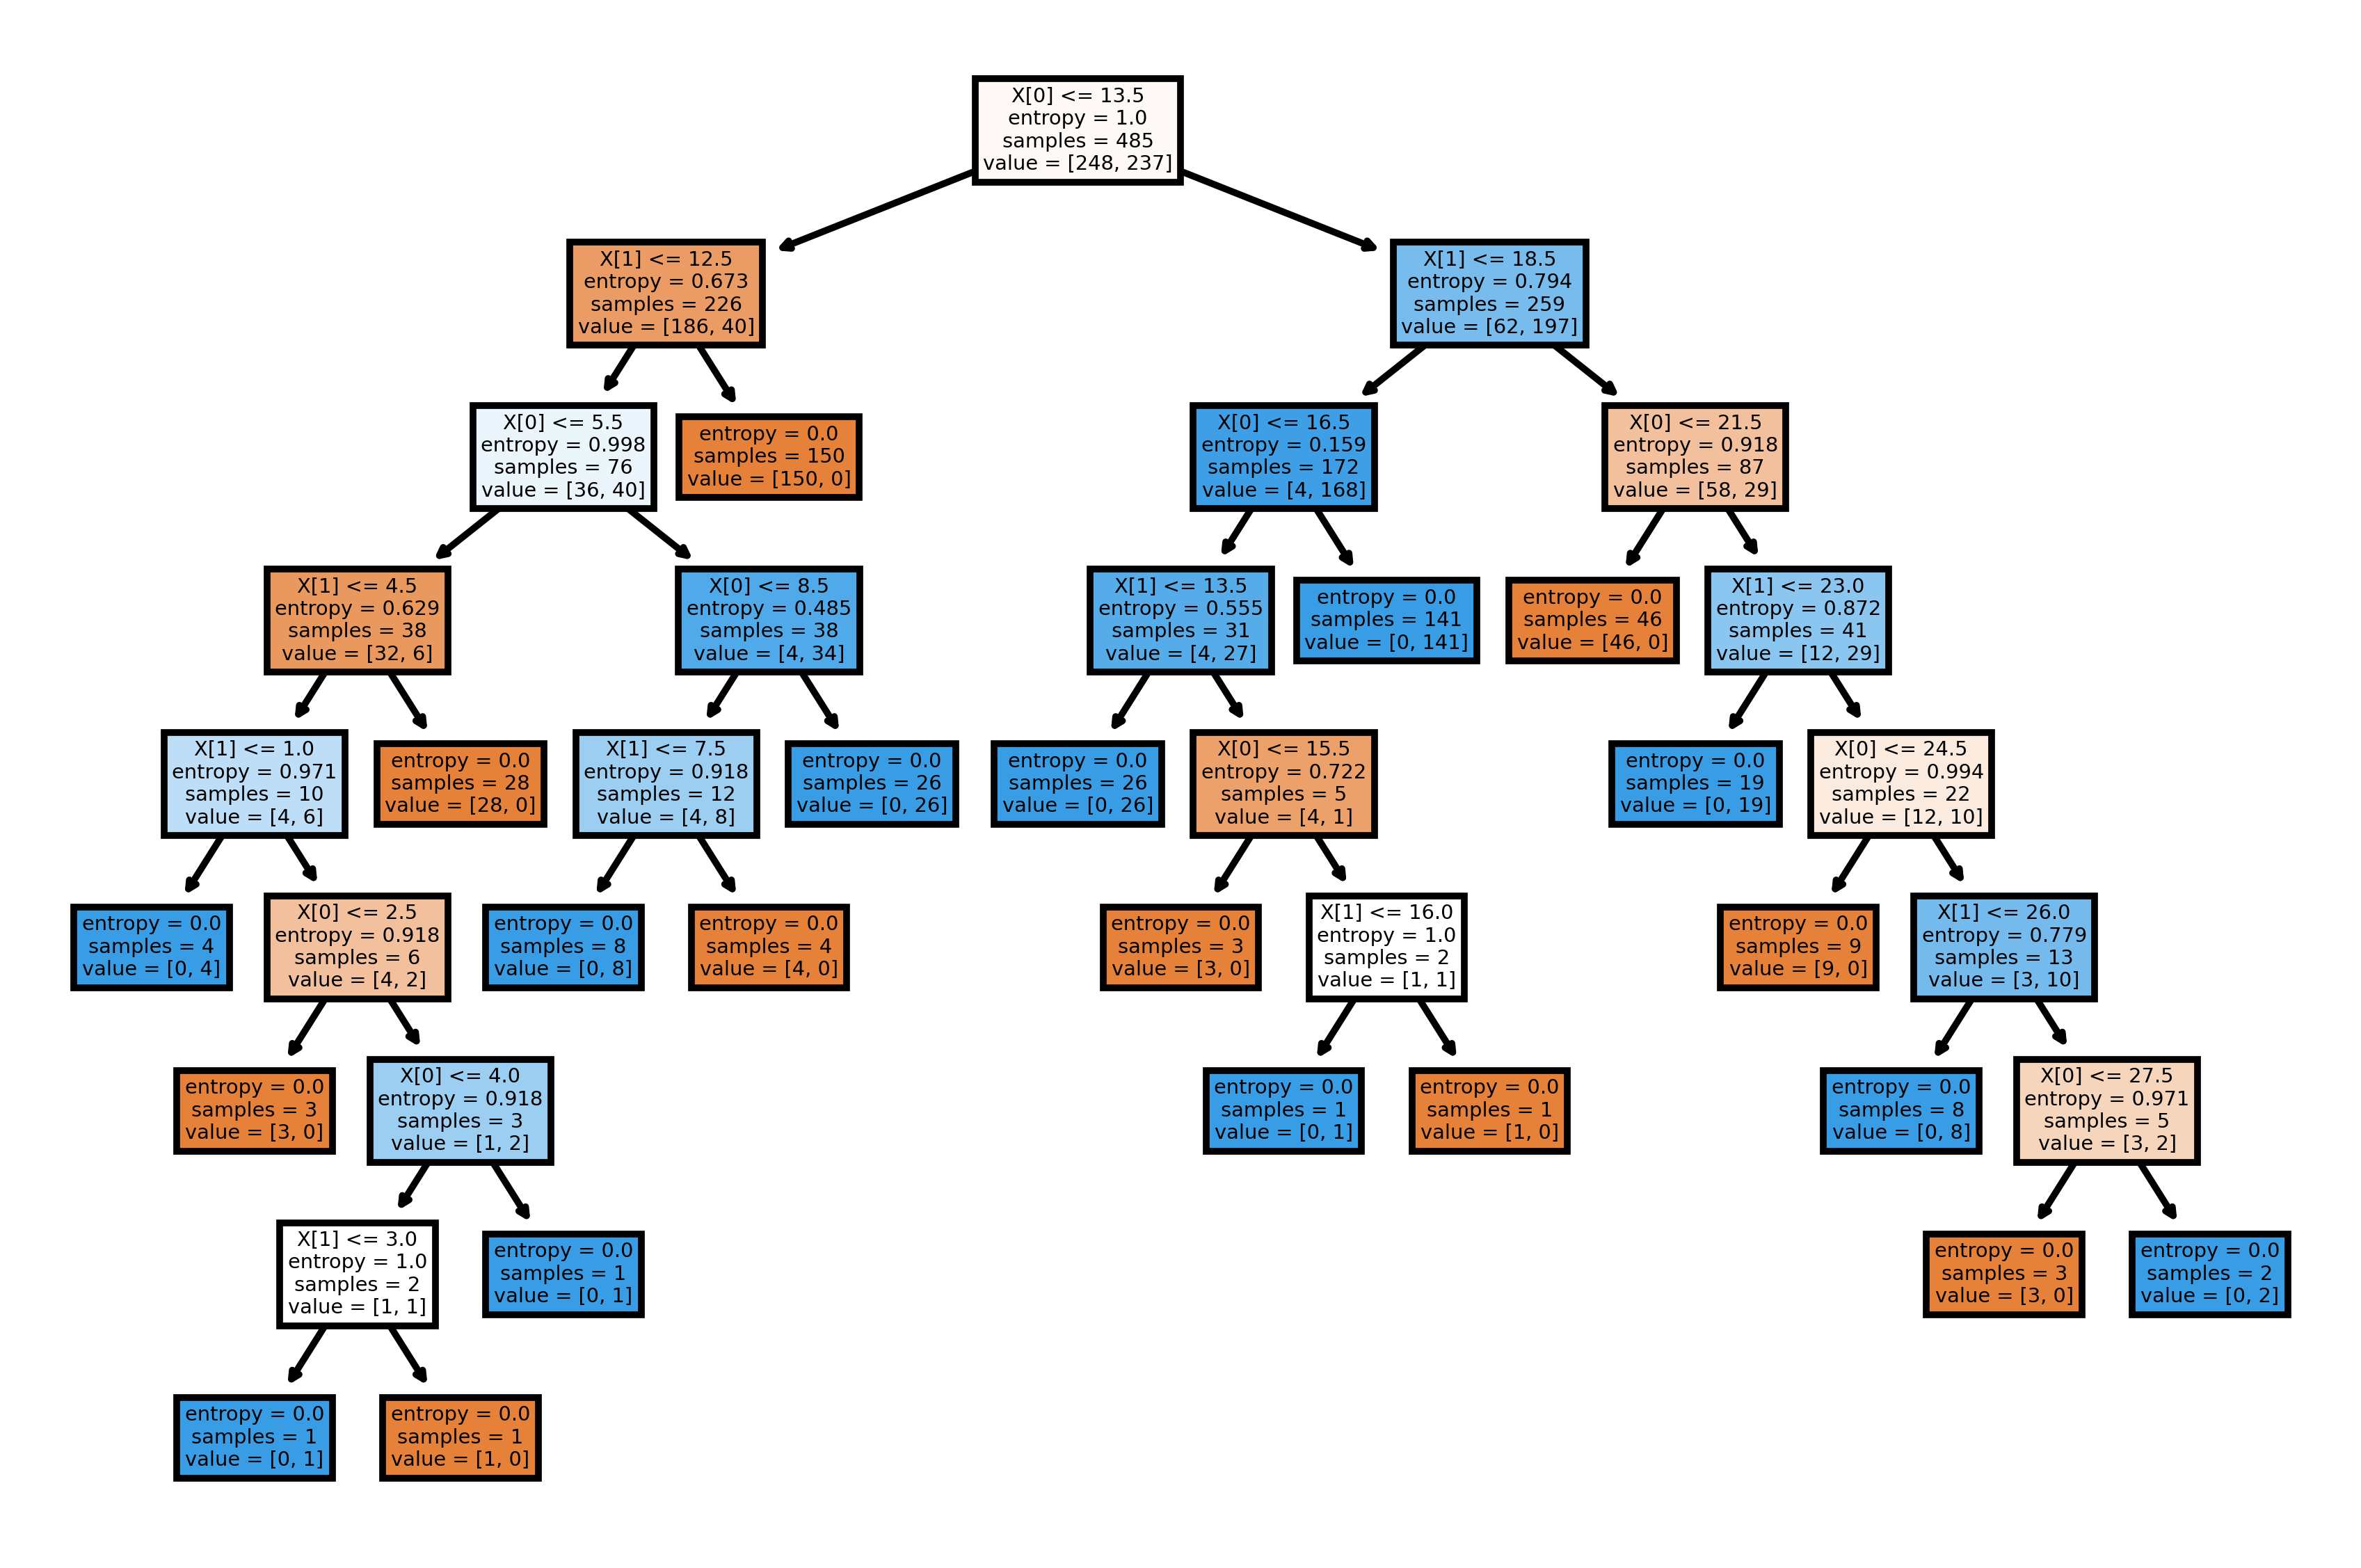

In [33]:
plot_tree(tree,filled=True);

In [40]:
from sklearn.datasets import load_digits

In [105]:
data=load_digits()
X,y=data.data,data.target

In [42]:
X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

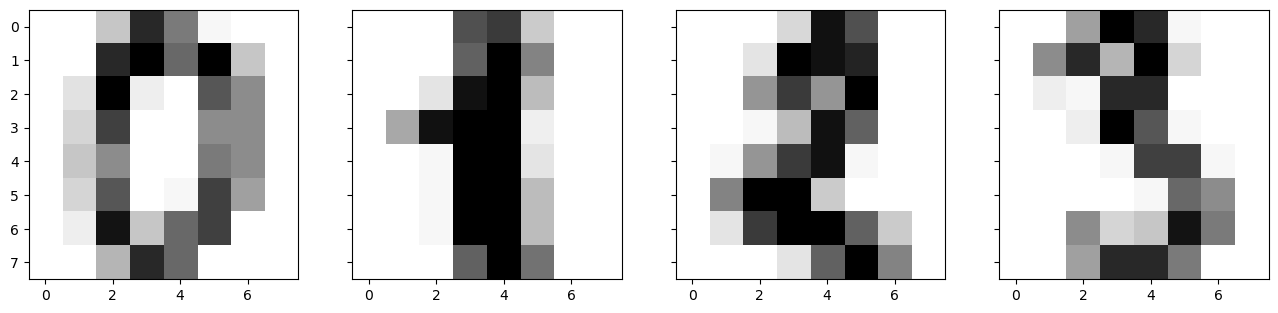

In [44]:
f,axes=plt.subplots(1,4,sharey=True,figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape(8,8),cmap='Greys')

In [128]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=17)

In [113]:
tree=DecisionTreeClassifier(max_depth=5,random_state=17)
knn_pipe=Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=10))])
tree.fit(X_train,y_train)
knn_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=10, p=2,
                                      weights='uniform'))],
         verbose=False)

In [114]:
tree_predict=tree.predict(X_test)
knn_predict=knn_pipe.predict(X_test)

In [115]:
accuracy_score(y_test,knn_predict), accuracy_score(y_test,tree_predict) 

(0.975925925925926, 0.6666666666666666)

In [124]:
tree_params={'max_depth':[1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
            'max_features':[1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid=GridSearchCV(tree,tree_params,cv=5,n_jobs=-1,verbose=True)
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 488 out of 495 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
     

In [125]:
tree_grid.best_params_, tree_grid.best_score_ 

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [141]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1),X_train,y_train,cv=5))

0.6357142857142857

In [129]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17),X_train,y_train,cv=5))

0.9753462341111744

In [134]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # first feature is proportional to target
    x1 = 0.3 * y

    # other features are noise

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()

Let's plot **Validation curves**, which are curves reflecting the relation between accuracy scores and hyperparameters of a machine learning model

In [136]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

In [149]:
from sklearn.model_selection import cross_val_score
cv_scores,holdout_scores=[],[]
n_neighb=[1,2,3,4,5]+list(range(50,600,50))

In [150]:
for k in n_neighb:
    knn_pipe=Pipeline([('scaler', StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=k))])
    cv_scores.append(np.mean(cross_val_score(knn_pipe,X_train,y_train,cv=5)))
    knn_pipe.fit(X_train,y_train)
    holdout_scores.append(accuracy_score(y_holdout,knn_pipe.predict(X_holdout)))

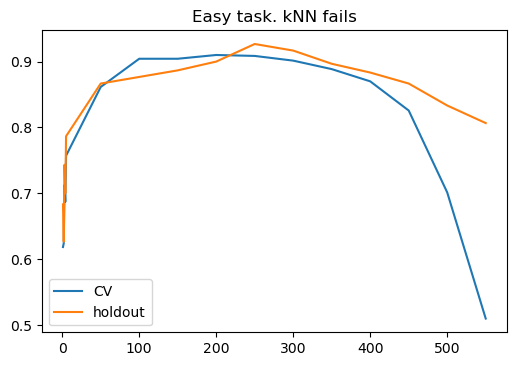

In [152]:
plt.plot(n_neighb,np.array(cv_scores),label='CV')
plt.plot(n_neighb,np.array(holdout_scores),label='holdout')
plt.title('Easy task. kNN fails')
plt.legend()